# Comparing optimization results

Level: Beginner-Intermediate

Topics: Optimization

This is a short and sweet lesson about comparing resulting designs from a series of optimizations. Here we have the [beam problem from the OpenMDAO docs page](http://openmdao.org/twodocs/versions/latest/examples/beam_optimization_example.html) and we're varying the normalized [Young's modulus (E)](https://en.wikipedia.org/wiki/Young%27s_modulus) to see the effect that it has on the optimal beam design to [minimize compliance](https://en.wikipedia.org/wiki/Stress%E2%80%93strain_analysis).


## Beam optimization formulation

We use the [BeamGroup from the OpenMDAO docs](https://github.com/OpenMDAO/OpenMDAO/blob/master/openmdao/test_suite/test_examples/beam_optimization/beam_group.py). The optimization problem is:

$$
  \begin{array}{r c l}
    \text{minimize} & & f^T d \\
    \text{with respect to} & & h \\
    \text{subject to} & & \text{sum}(h) b L_0 = \text{volume} \\
  \end{array}
$$

where $f$ is the vector of forces, $h$ is the vector of beam heights, and $L_0$ is the length of a single beam element.

The displacements vector $d$ is given by

$$
  K d = f 
$$

where $K$ is the stiffness matrix. However, in practice, we augment the linear system with Lagrange multipliers to apply the boundary constraints at the first node.

## Your goal

We want to interpret the results from a series of optimizations. If we change $E$, the elastic modulus, how will our compliance (displacement) of the beam change? Should we invest in stiffer materials to reduce compliance, or is a lower $E$ value acceptable in terms of our displacements? Performing these optimizations and seeing the results will help us make that decision.

This is mostly set up for your below, but the issue is that we're not seeing smooth trends between different optimized points! Thus, it's challenging to pinpoint exactly what effect $E$ has on our optimal results.

Can you change the driver options below to obtain a better Pareto front for the results? How can you make the resulting curve more smooth and easy to interpret? 

Optimization FAILED.
Iteration limit reached
-----------------------------------
Compliance = [17481.44360999]
Optimization FAILED.
Iteration limit reached
-----------------------------------
Compliance = [17753.97781179]
Optimization FAILED.
Iteration limit reached
-----------------------------------
Compliance = [16370.70889166]
Optimization FAILED.
Iteration limit reached
-----------------------------------
Compliance = [13548.97650643]
Optimization FAILED.
Iteration limit reached
-----------------------------------
Compliance = [12507.63540129]
Optimization FAILED.
Iteration limit reached
-----------------------------------
Compliance = [11921.24788886]
Optimization FAILED.
Iteration limit reached
-----------------------------------
Compliance = [11557.75177216]
Optimization FAILED.
Iteration limit reached
-----------------------------------
Compliance = [11412.4014389]
Optimization FAILED.
Iteration limit reached
-----------------------------------
Compliance = [10192.01228032]
Op

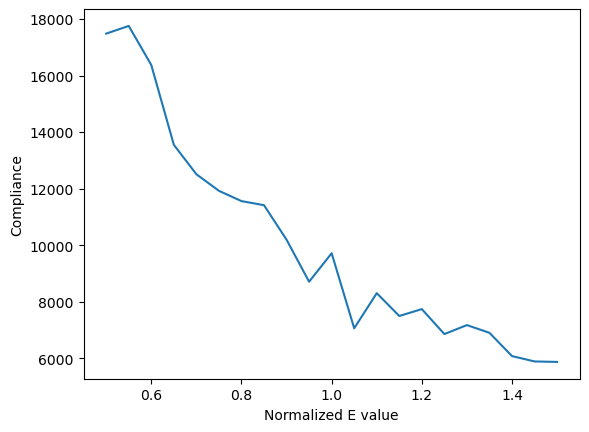

In [84]:
import openmdao.api as om
import numpy as np
from openmdao.test_suite.test_examples.beam_optimization.beam_group import BeamGroup
import matplotlib.pyplot as plt
%matplotlib inline

E_values = np.linspace(0.5, 1.5, 21)
obj_values = []

for E in E_values:
    L = 1.
    b = 0.1
    volume = 0.01

    num_elements = 10

    prob = om.Problem(model=BeamGroup(E=E, L=L, b=b, volume=volume, num_elements=num_elements))

    prob.driver = om.ScipyOptimizeDriver()
    prob.driver.options['optimizer'] = 'SLSQP'
    prob.driver.options['tol'] = 1e-2
    prob.driver.options['maxiter'] = 32    
    prob.driver.options['disp'] = False

    prob.setup()

    prob.run_driver()

    compliance = prob.get_val('compliance_comp.compliance')
    print(f"Compliance = {compliance}")
    obj_values.append(compliance)

plt.plot(E_values, obj_values)
plt.xlabel('Normalized E value')
plt.ylabel('Compliance')
plt.show()